In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [5]:
data = pd.read_csv('winequality-red.csv', sep=';')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [7]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
M = data.corr()
M

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<Axes: >

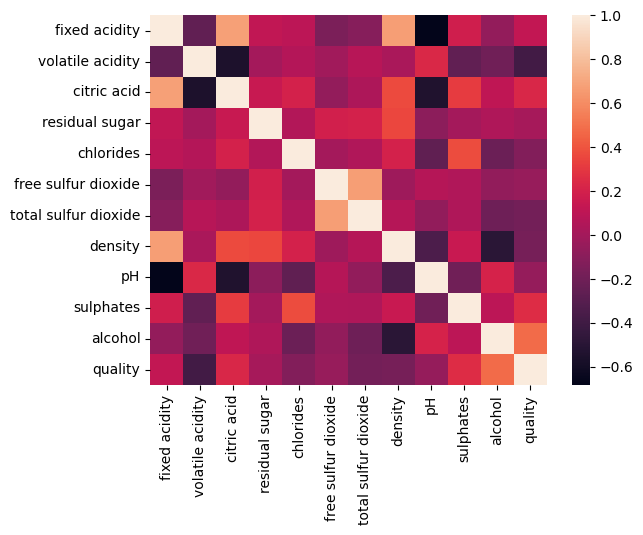

In [11]:
sns.heatmap(M)

In [26]:
wine = (data - data.mean())/data.std()
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946,-0.787576
1,-0.298454,1.966827,-1.391037,0.043403,0.223805,0.872365,0.624168,0.028252,-0.719708,0.128910,-0.584594,-0.787576
2,-0.298454,1.296660,-1.185699,-0.169374,0.096323,-0.083643,0.228975,0.134222,-0.331073,-0.048074,-0.584594,-0.787576
3,1.654339,-1.384011,1.483689,-0.453077,-0.264878,0.107558,0.411372,0.664069,-0.978798,-0.461036,-0.584594,0.450707
4,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946,-0.787576
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217415,0.403103,-0.980362,-0.382151,0.053829,1.541571,-0.075020,-0.978459,0.899605,-0.461036,0.072271,-0.787576
1595,-1.389721,0.123866,-0.877693,-0.240300,-0.541090,2.210777,0.137777,-0.861893,1.353012,0.600867,0.729136,0.450707
1596,-1.159980,-0.099523,-0.723690,-0.169374,-0.243630,1.254769,-0.196617,-0.533387,0.705287,0.541872,0.541460,0.450707
1597,-1.389721,0.654416,-0.775024,-0.382151,-0.264878,1.541571,-0.075020,-0.676446,1.676875,0.305894,-0.209243,-0.787576


In [34]:
# standization with sklearn
scaler = StandardScaler()
wine2 = scaler.fit_transform(data)
wine2

array([[-0.52835961,  0.96187667, -1.39147228, ..., -0.57920652,
        -0.96024611, -0.78782264],
       [-0.29854743,  1.96744245, -1.39147228, ...,  0.1289504 ,
        -0.58477711, -0.78782264],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.04808883,
        -0.58477711, -0.78782264],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.54204194,
         0.54162988,  0.45084835],
       [-1.39015528,  0.65462046, -0.77526673, ...,  0.30598963,
        -0.20930812, -0.78782264],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.01092425,
         0.54162988,  0.45084835]])

In [40]:
wine_corr = wine.corr()

In [127]:
wine2_corr = np.corrcoef(wine2, rowvar=False)
wine2_corr.shape

(12, 12)

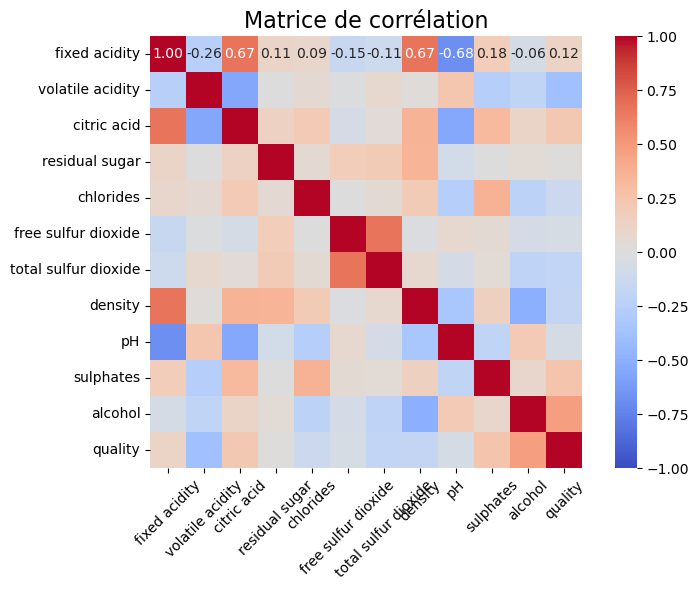

In [48]:
# Visualiser avec une heatmap
plt.figure(figsize=(8, 6))  # Ajuster la taille de la figure
sns.heatmap(
    wine_corr, 
    annot=True,          # Afficher les coefficients sur la heatmap
    fmt=".2f",           # Formater les valeurs (2 chiffres après la virgule)
    cmap="coolwarm",     # Palette de couleurs (alternatives : 'viridis', 'plasma', 'cividis', etc.)
    vmin=-1, vmax=1,     # Fixer l'échelle des couleurs (pour les corrélations)
    square=True          # Maintenir les cellules carrées
)

# Ajouter un titre pour plus de clarté
plt.title("Matrice de corrélation", fontsize=16)
plt.xticks(rotation=45)  # Incliner les étiquettes des colonnes
plt.yticks(rotation=0)   # Garder les étiquettes des lignes horizontales
plt.tight_layout()
plt.show()

In [50]:
wine_eigvalues, wine_eigvectors = np.linalg.eig(wine_corr)

In [52]:
wine_eigvectors[0]

array([ 0.48788336, -0.00417321, -0.16482854, -0.23109808, -0.07877938,
       -0.63857976, -0.25643792,  0.18295601, -0.17457815, -0.20052866,
        0.30721496, -0.0555313 ])

In [54]:
wine_corr.dot(wine_eigvectors[0])

fixed acidity           0.650488
volatile acidity       -0.081350
citric acid             0.265628
residual sugar         -0.283655
chlorides              -0.147725
free sulfur dioxide    -0.963569
total sulfur dioxide   -0.831711
density                 0.233620
pH                     -0.363371
sulphates              -0.159939
alcohol                 0.192726
quality                 0.130054
dtype: float64

In [56]:
wine_eigvalues

array([3.1211677 , 2.24188204, 1.68291969, 1.21502087, 0.97326362,
       0.05951792, 0.18021863, 0.32791939, 0.41130754, 0.50587256,
       0.6183178 , 0.66259224])

In [58]:
np.dot(wine_corr, wine_eigvectors[:,0])/wine_eigvectors[:,0]

array([3.1211677, 3.1211677, 3.1211677, 3.1211677, 3.1211677, 3.1211677,
       3.1211677, 3.1211677, 3.1211677, 3.1211677, 3.1211677, 3.1211677])

In [60]:
wine_eigvectors

array([[ 0.48788336, -0.00417321, -0.16482854, -0.23109808, -0.07877938,
        -0.63857976, -0.25643792,  0.18295601, -0.17457815, -0.20052866,
         0.30721496, -0.0555313 ],
       [-0.26512898,  0.33896786, -0.22708884,  0.04185824,  0.29937933,
        -0.00466168,  0.37716123, -0.15510563, -0.06022334, -0.14612614,
         0.62623369, -0.297287  ],
       [ 0.47333547, -0.1373581 ,  0.10022856, -0.0567358 , -0.12014871,
         0.07003691,  0.62432783, -0.34608556, -0.22097505, -0.29633271,
        -0.24414858, -0.13663328],
       [ 0.13915442,  0.16773634,  0.24362014, -0.38303758,  0.70936319,
        -0.18364637,  0.08807787,  0.05223656,  0.27818728,  0.17062614,
        -0.28385429, -0.10931059],
       [ 0.19742679,  0.18978819, -0.02660785,  0.65477782,  0.26623723,
        -0.05393118, -0.20861667,  0.00386273, -0.41993639,  0.18692254,
        -0.23054697, -0.33733656],
       [-0.04588071,  0.25948314,  0.61611132, -0.03371148, -0.15941286,
         0.05192167,  

In [62]:
wine_eigvectors[:,0]

array([ 0.48788336, -0.26512898,  0.47333547,  0.13915442,  0.19742679,
       -0.04588071,  0.00406675,  0.37030119, -0.43272085,  0.25453535,
       -0.07317678,  0.11248878])

In [64]:
-np.sort(-wine_eigvalues)

array([3.1211677 , 2.24188204, 1.68291969, 1.21502087, 0.97326362,
       0.66259224, 0.6183178 , 0.50587256, 0.41130754, 0.32791939,
       0.18021863, 0.05951792])

In [66]:
np.set_printoptions(precision=3, suppress=True)

X = -np.sort(-wine_eigvalues).reshape(-1,1)
X_freq = X/X.sum().reshape(-1,1)
X_fcc = X_freq.cumsum().reshape(-1,1)

axes = np.concatenate((X, X_freq*100, X_fcc*100), axis=1)
axes

array([[  3.121,  26.01 ,  26.01 ],
       [  2.242,  18.682,  44.692],
       [  1.683,  14.024,  58.716],
       [  1.215,  10.125,  68.842],
       [  0.973,   8.111,  76.952],
       [  0.663,   5.522,  82.474],
       [  0.618,   5.153,  87.626],
       [  0.506,   4.216,  91.842],
       [  0.411,   3.428,  95.27 ],
       [  0.328,   2.733,  98.002],
       [  0.18 ,   1.502,  99.504],
       [  0.06 ,   0.496, 100.   ]])

In [68]:
axes = pd.DataFrame(axes, columns=["Valeur Propre", "Inertie Expliqué (%)", "Cumulé"])
axes

,Valeur Propre,Inertie Expliqué (%),Cumulé
0,3.121168,26.009731,26.009731
1,2.241882,18.682350,44.692081
2,1.682920,14.024331,58.716412
3,1.215021,10.125174,68.841586
4,0.973264,8.110530,76.952116
5,0.662592,5.521602,82.473718
6,0.618318,5.152648,87.626366
7,0.505873,4.215605,91.841971
8,0.411308,3.427563,95.269534
9,0.327919,2.732662,98.002195


In [70]:
indice = np.argsort(-wine_eigvalues)
indice

array([ 0,  1,  2,  3,  4, 11, 10,  9,  8,  7,  6,  5])

In [72]:
wine_eigvalues[indice]

array([3.121, 2.242, 1.683, 1.215, 0.973, 0.663, 0.618, 0.506, 0.411,
       0.328, 0.18 , 0.06 ])

In [74]:
wine_eigvectors

array([[ 0.488, -0.004, -0.165, -0.231, -0.079, -0.639, -0.256,  0.183,
        -0.175, -0.201,  0.307, -0.056],
       [-0.265,  0.339, -0.227,  0.042,  0.299, -0.005,  0.377, -0.155,
        -0.06 , -0.146,  0.626, -0.297],
       [ 0.473, -0.137,  0.1  , -0.057, -0.12 ,  0.07 ,  0.624, -0.346,
        -0.221, -0.296, -0.244, -0.137],
       [ 0.139,  0.168,  0.244, -0.383,  0.709, -0.184,  0.088,  0.052,
         0.278,  0.171, -0.284, -0.109],
       [ 0.197,  0.19 , -0.027,  0.655,  0.266, -0.054, -0.209,  0.004,
        -0.42 ,  0.187, -0.231, -0.337],
       [-0.046,  0.259,  0.616, -0.034, -0.159,  0.052,  0.238,  0.585,
        -0.318,  0.019,  0.138,  0.043],
       [ 0.004,  0.364,  0.541, -0.028, -0.218, -0.07 , -0.355, -0.589,
         0.122, -0.09 ,  0.11 , -0.116],
       [ 0.37 ,  0.331, -0.169, -0.201,  0.209,  0.567, -0.231, -0.044,
        -0.249, -0.08 ,  0.123,  0.426],
       [-0.433, -0.065,  0.07 , -0.005,  0.258, -0.341, -0.006, -0.208,
        -0.462, -0.315, 

In [76]:
sort_eigvectors = wine_eigvectors[:,indice]

In [78]:
x = sort_eigvectors[:, 0]
y = sort_eigvectors[:, 1]
z = sort_eigvectors[:, 2]

In [80]:
wine_x = np.dot(wine, x)
wine_x

array([-1.779, -1.004, -0.915, ..., -1.366, -2.366, -0.289])

In [82]:
wine_x.shape

(1599,)

In [84]:
wine_x = wine_x.reshape(-1, 1)
wine_x

array([[-1.779],
       [-1.004],
       [-0.915],
       ...,
       [-1.366],
       [-2.366],
       [-0.289]])

In [86]:
wine_y = np.dot(wine, y)
wine_y = wine_y.reshape(-1, 1)
wine_y

array([[ 1.157],
       [ 2.071],
       [ 1.393],
       ...,
       [-0.517],
       [ 0.703],
       [-1.24 ]])

In [88]:
wine_z = np.dot(wine, z)
wine_z = wine_z.reshape(-1, 1)
wine_z

array([[-1.386],
       [ 0.008],
       [-0.699],
       ...,
       [ 1.25 ],
       [ 0.899],
       [ 1.218]])

Text(0, 0.5, '2eme Axe Prinpale(18.682350358265882%)')

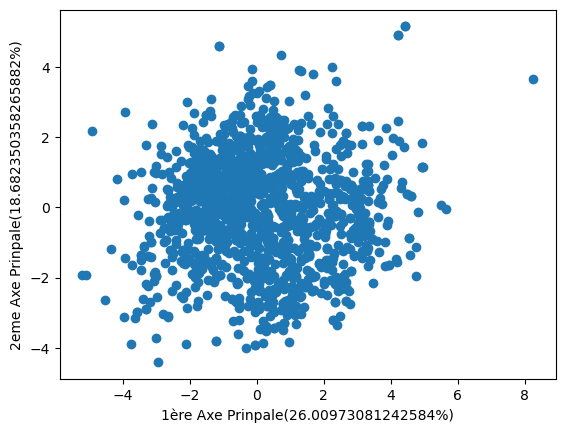

In [90]:
plt.figure()
plt.scatter(wine_x, wine_y)
plt.xlabel(f"1ère Axe Prinpale({axes.loc[0, 'Inertie Expliqué (%)']}%)")
plt.ylabel(f"2eme Axe Prinpale({axes.loc[1, 'Inertie Expliqué (%)']}%)")

## 2nd Method

In [135]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(wine2)
X_pca.shape

(1599, 2)

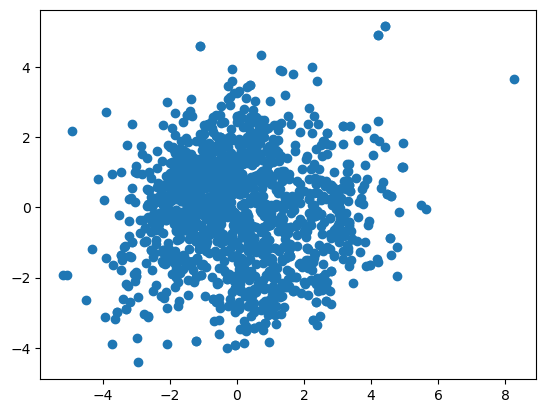

In [137]:
plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1])

In [139]:
explained_variance = pca.explained_variance_ratio_
eigvalue = pca.explained_variance_
components = pca.components_

print("Valeurs propres: ", eigvalue)
print("Variance expliquée: ", explained_variance)
print("Vecteurs propres: ", components)

Valeurs propres:  [3.123 2.243]
Variance expliquée:  [0.26  0.187]
Vecteurs propres:  [[ 0.488 -0.265  0.473  0.139  0.197 -0.046  0.004  0.37  -0.433  0.255
  -0.073  0.112]
 [-0.004  0.339 -0.137  0.168  0.19   0.259  0.364  0.331 -0.065 -0.109
  -0.503 -0.473]]


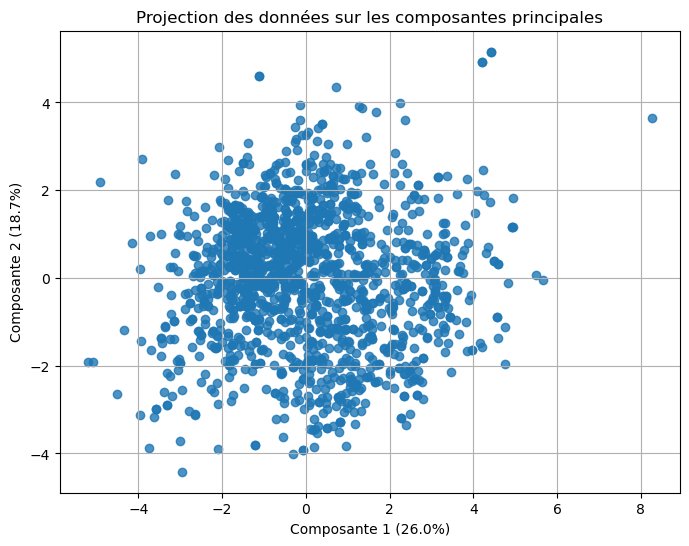

In [172]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.8)
plt.xlabel(f"Composante 1 ({explained_variance[0]:.1%})")
plt.ylabel(f"Composante 2 ({explained_variance[1]:.1%})")
plt.title("Projection des données sur les composantes principales")
plt.grid()

In [ ]:
def plot_correlation_circle(pca_components, features, explained_variance):
    plt.figure(figsize=(8, 8))
    plt.axhline(0)
    for i, (x, y) in enumerate(pca_components):
        np.sqrt(explained_variance[0])*x
        np.sqrt(explained_variance[1])*x

In [210]:
features = data.columns
features

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

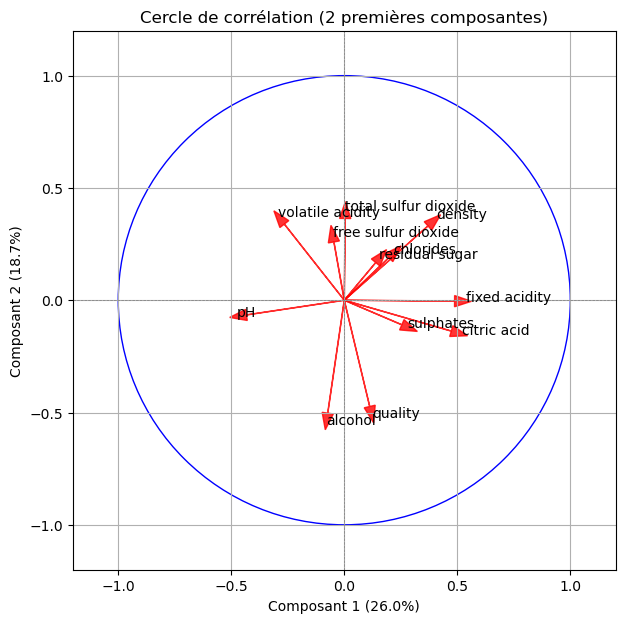

In [223]:
plt.figure(figsize=(7, 7))
plt.axhline(0, linestyle = '--', linewidth = 0.5, color='gray')
plt.axvline(0, linestyle = '--', linewidth = 0.5, color='gray')
cercle = plt.Circle((0, 0), 1, color='blue', fill=False)
plt.gca().add_artist(cercle)

for i, (x, y) in enumerate(zip(components[0], components[1])):
    plt.arrow(0, 0, x, y, alpha=0.8, head_width=0.05, color='red')
    plt.text(x*1.1, y*1.1, f"{features[i]}", color='black')

plt.title("Cercle de corrélation (2 premières composantes)")
plt.xlabel(f"Composant 1 ({explained_variance[0]:.1%})")
plt.ylabel(f"Composant 2 ({explained_variance[1]:.1%})")
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.grid()